<H3>
    <P>XỬ LÝ ẢNH VÀ THỊ GIÁC MÁY TÍNH - 2019</P>
    <P>LÊ NGUYỄN SƠN NGUYÊN - CH1702039</P>
    <P>XỬ LÝ ẢNH NHIỄU SỐ 2</P>
</H3>

In [21]:
import numpy as np
from skimage import color, data, restoration

import cv2
import matplotlib.pyplot as plt

In [22]:
%matplotlib inline

In [23]:
plt.rcParams['figure.dpi'] = 500

In [24]:
img = cv2.imread('./Anh nhieu/2n.jpg', 0)

SHOW HÌNH SỐ 2 BỊ NHIỄU

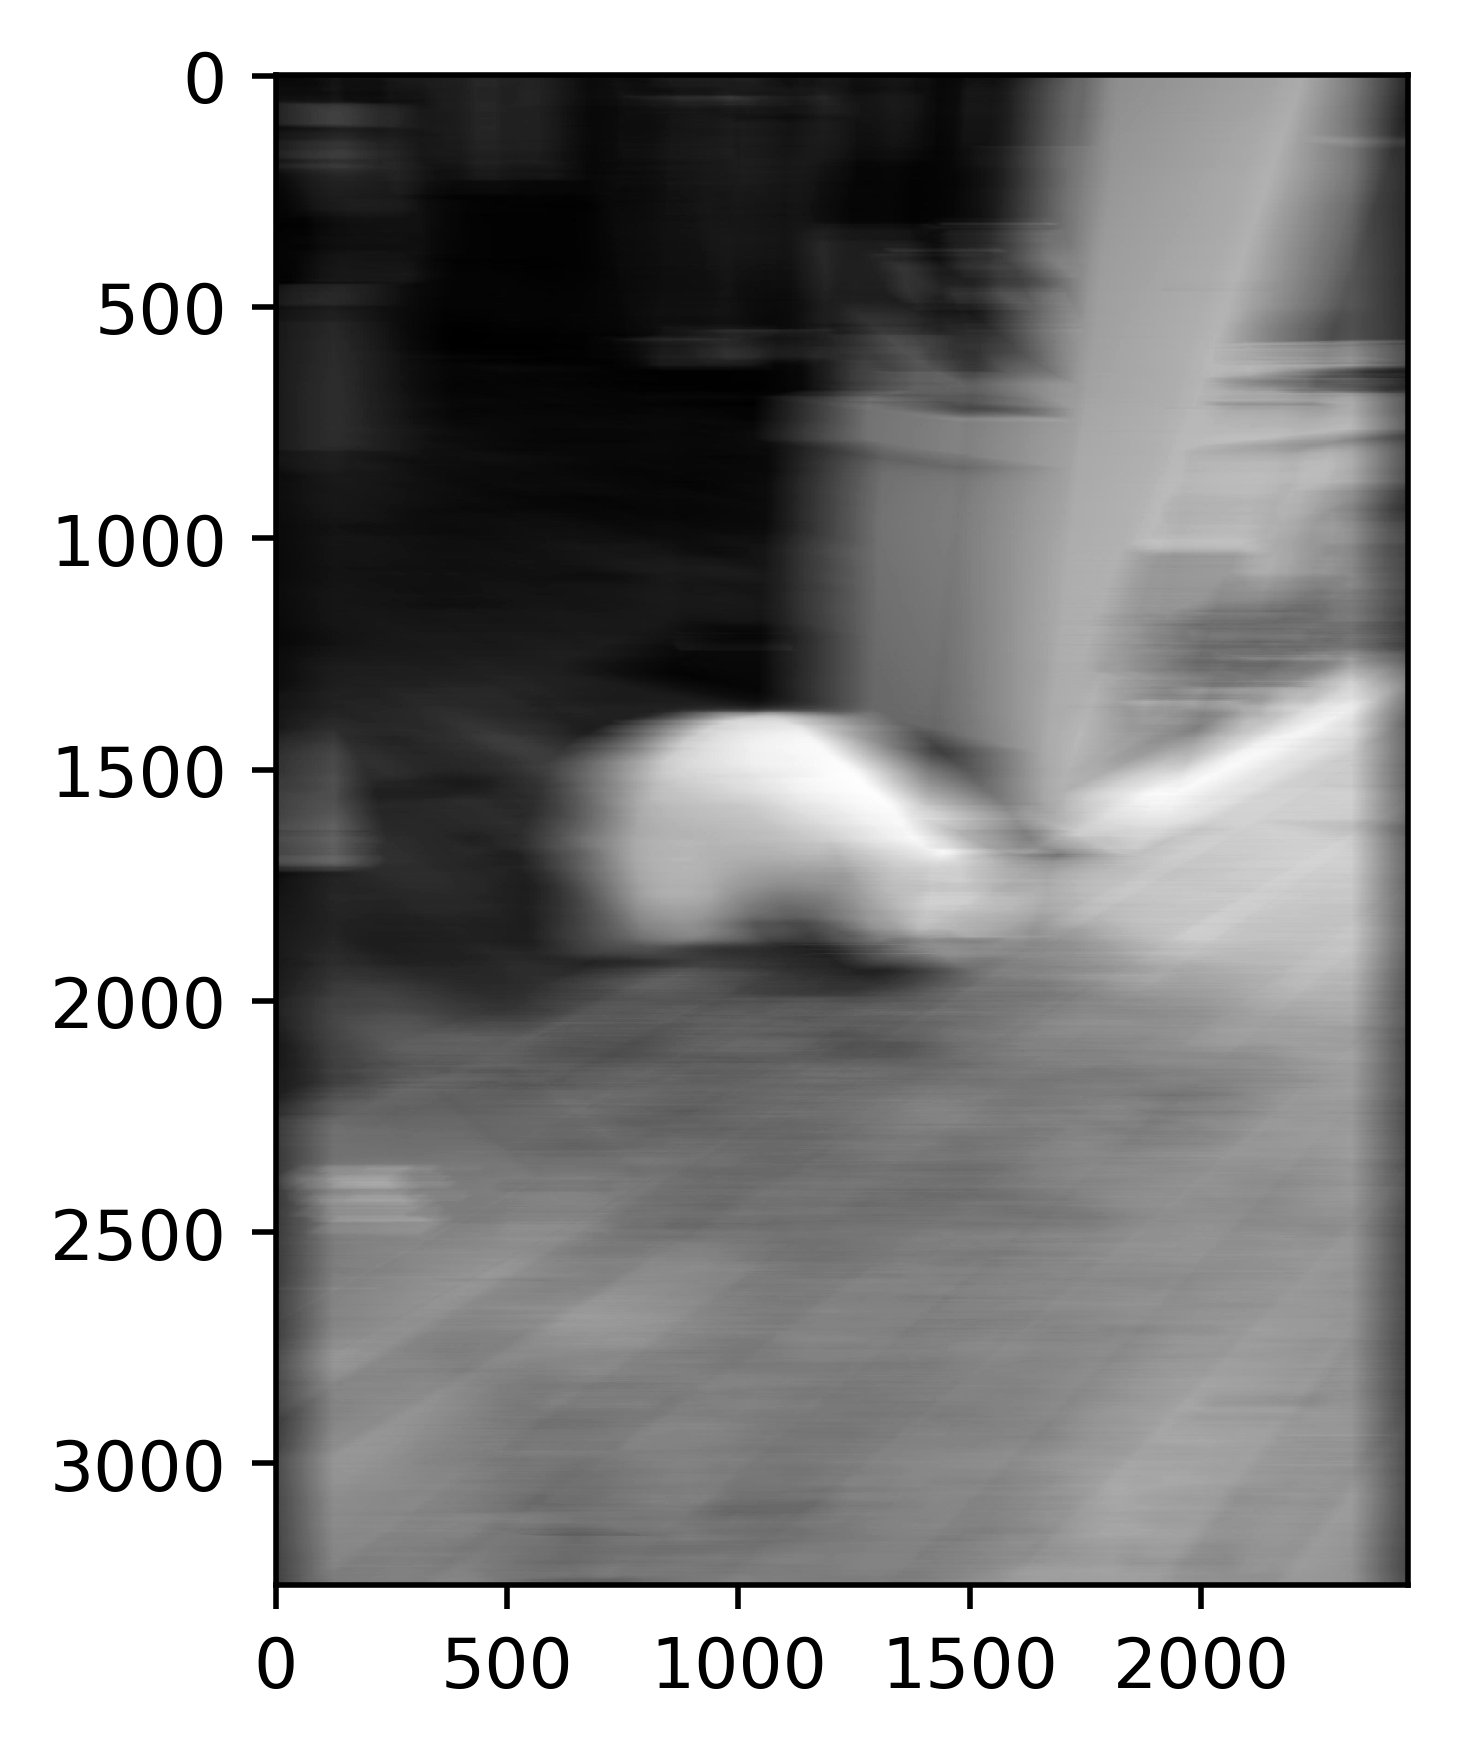

In [25]:
plt.imshow(img, cmap='gray')

CHUYỂN ẢNH VỀ MIỀN TẦN SỐ ĐỂ KIỂM TRA

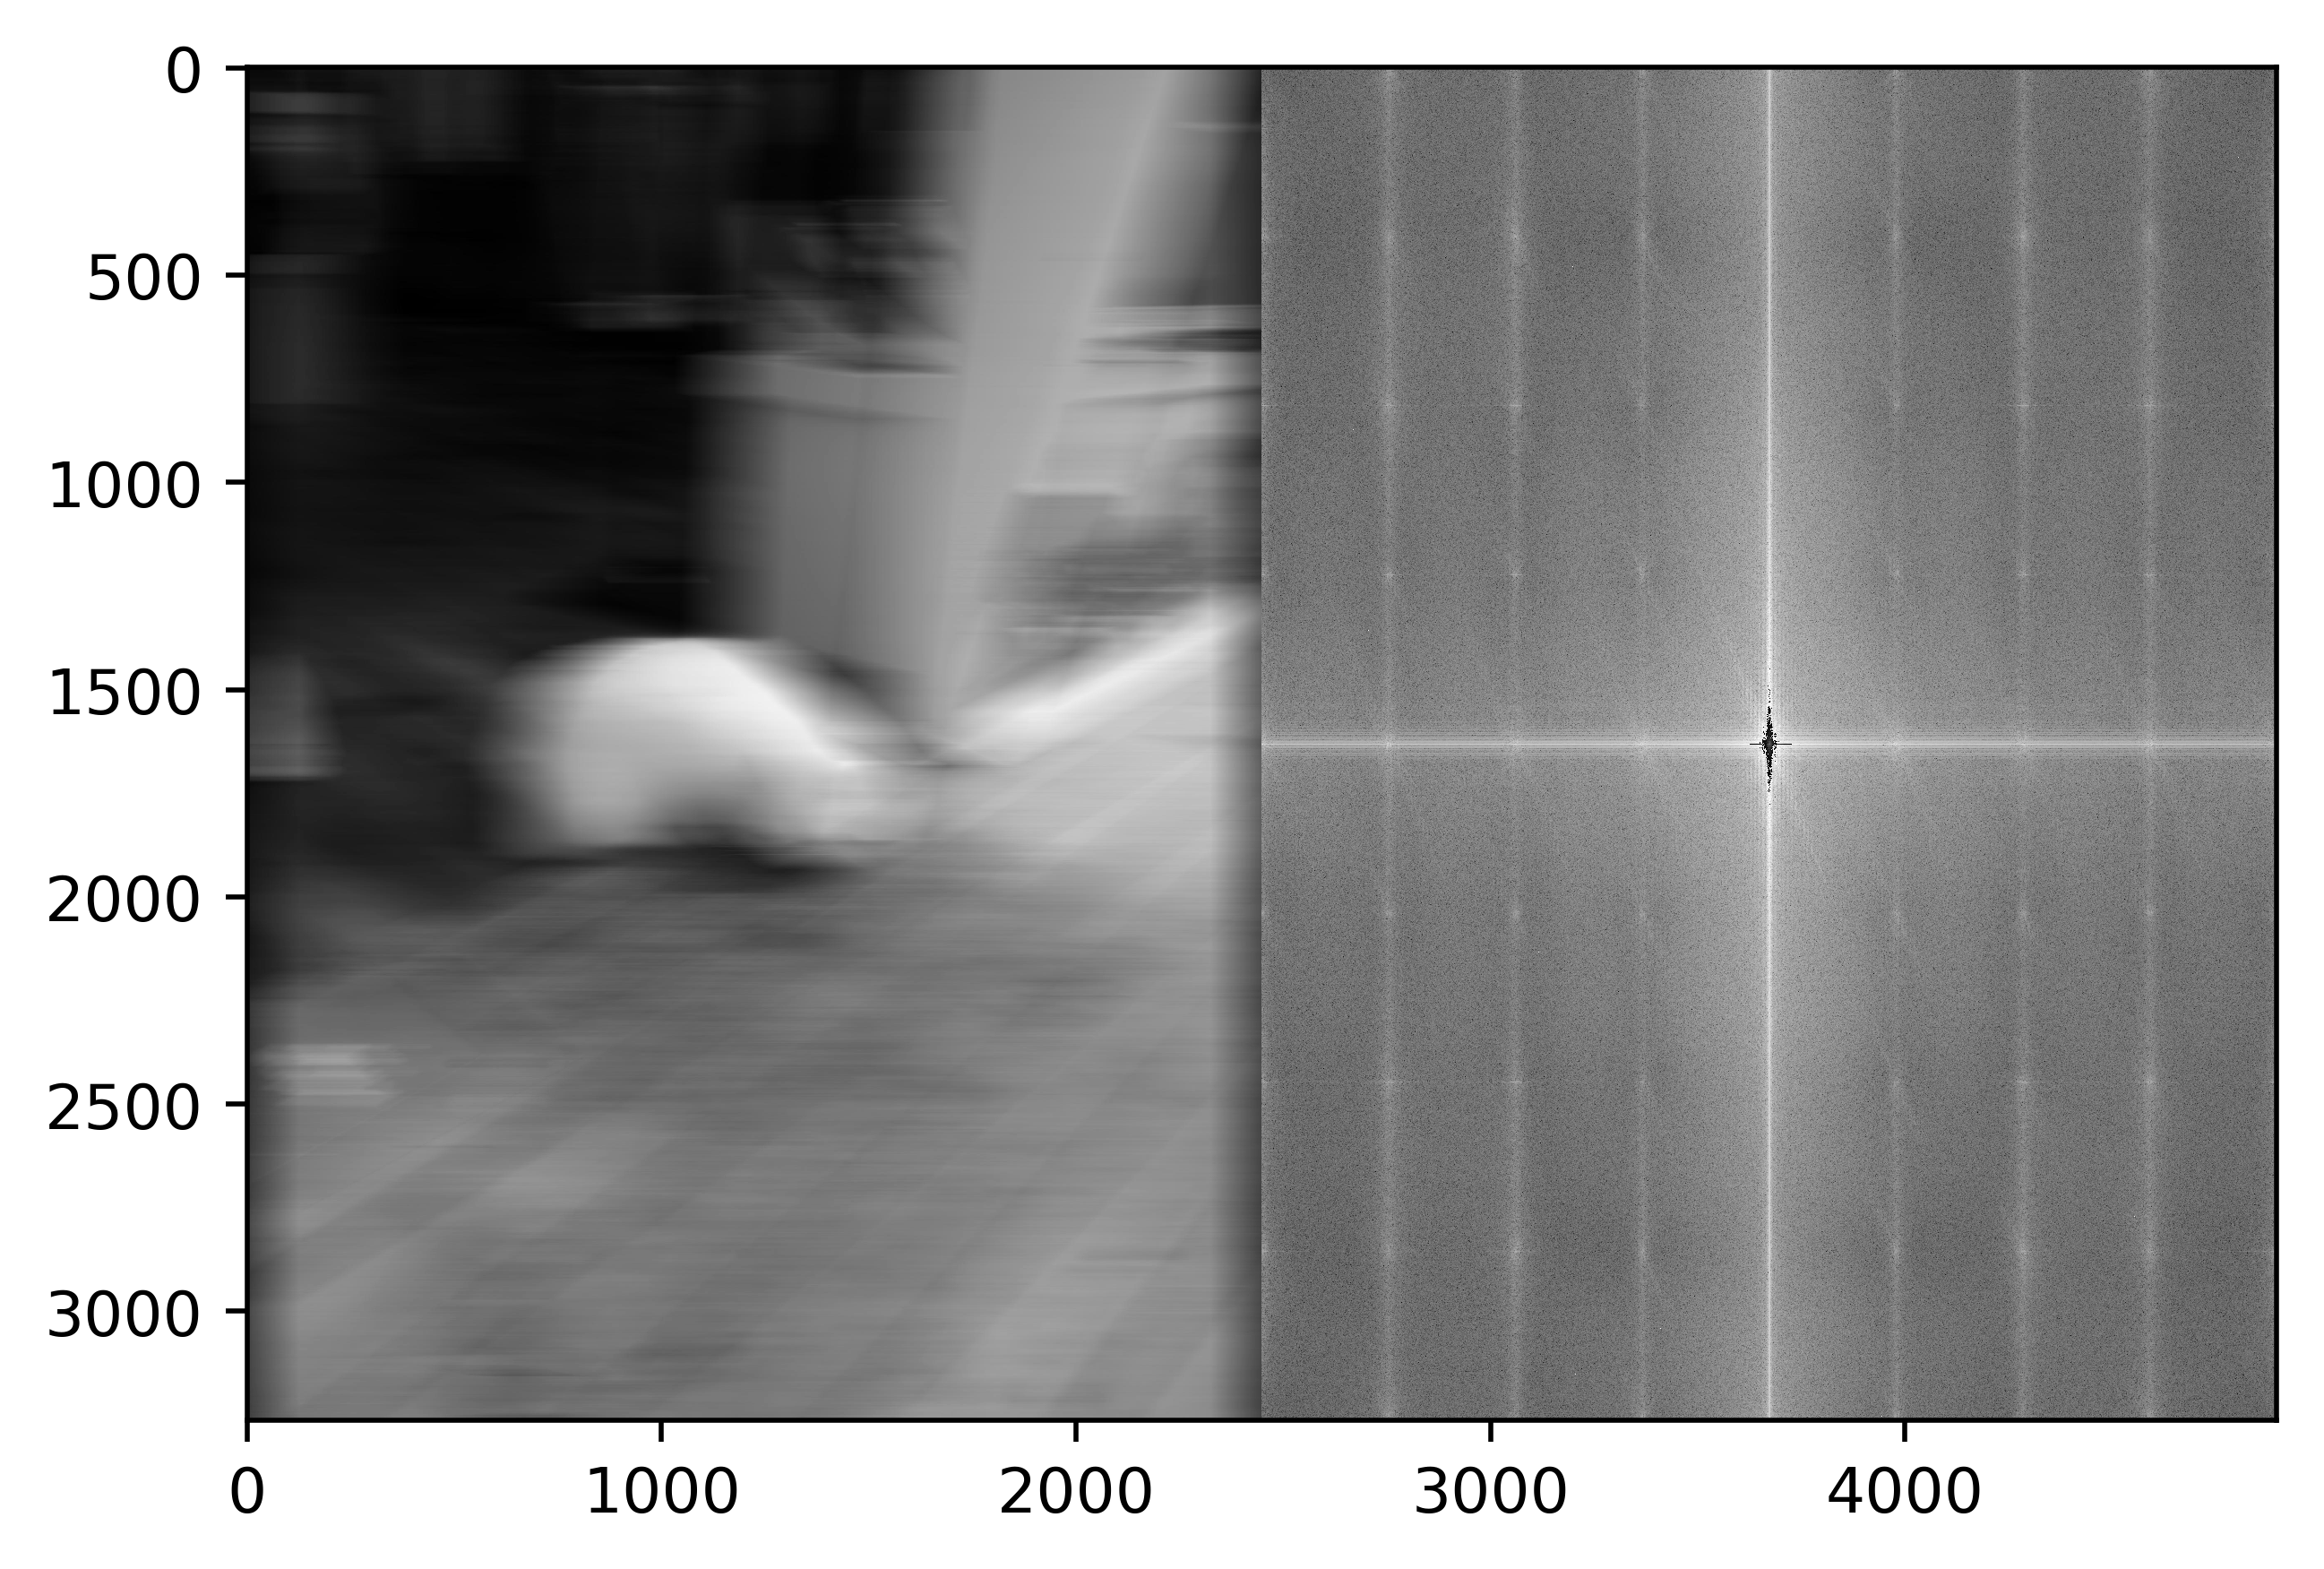

In [26]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum = np.asarray(magnitude_spectrum, dtype=np.uint8)

img_and_magnitude = np.concatenate((img, magnitude_spectrum), axis=1)
plt.imshow(img_and_magnitude, cmap='gray')

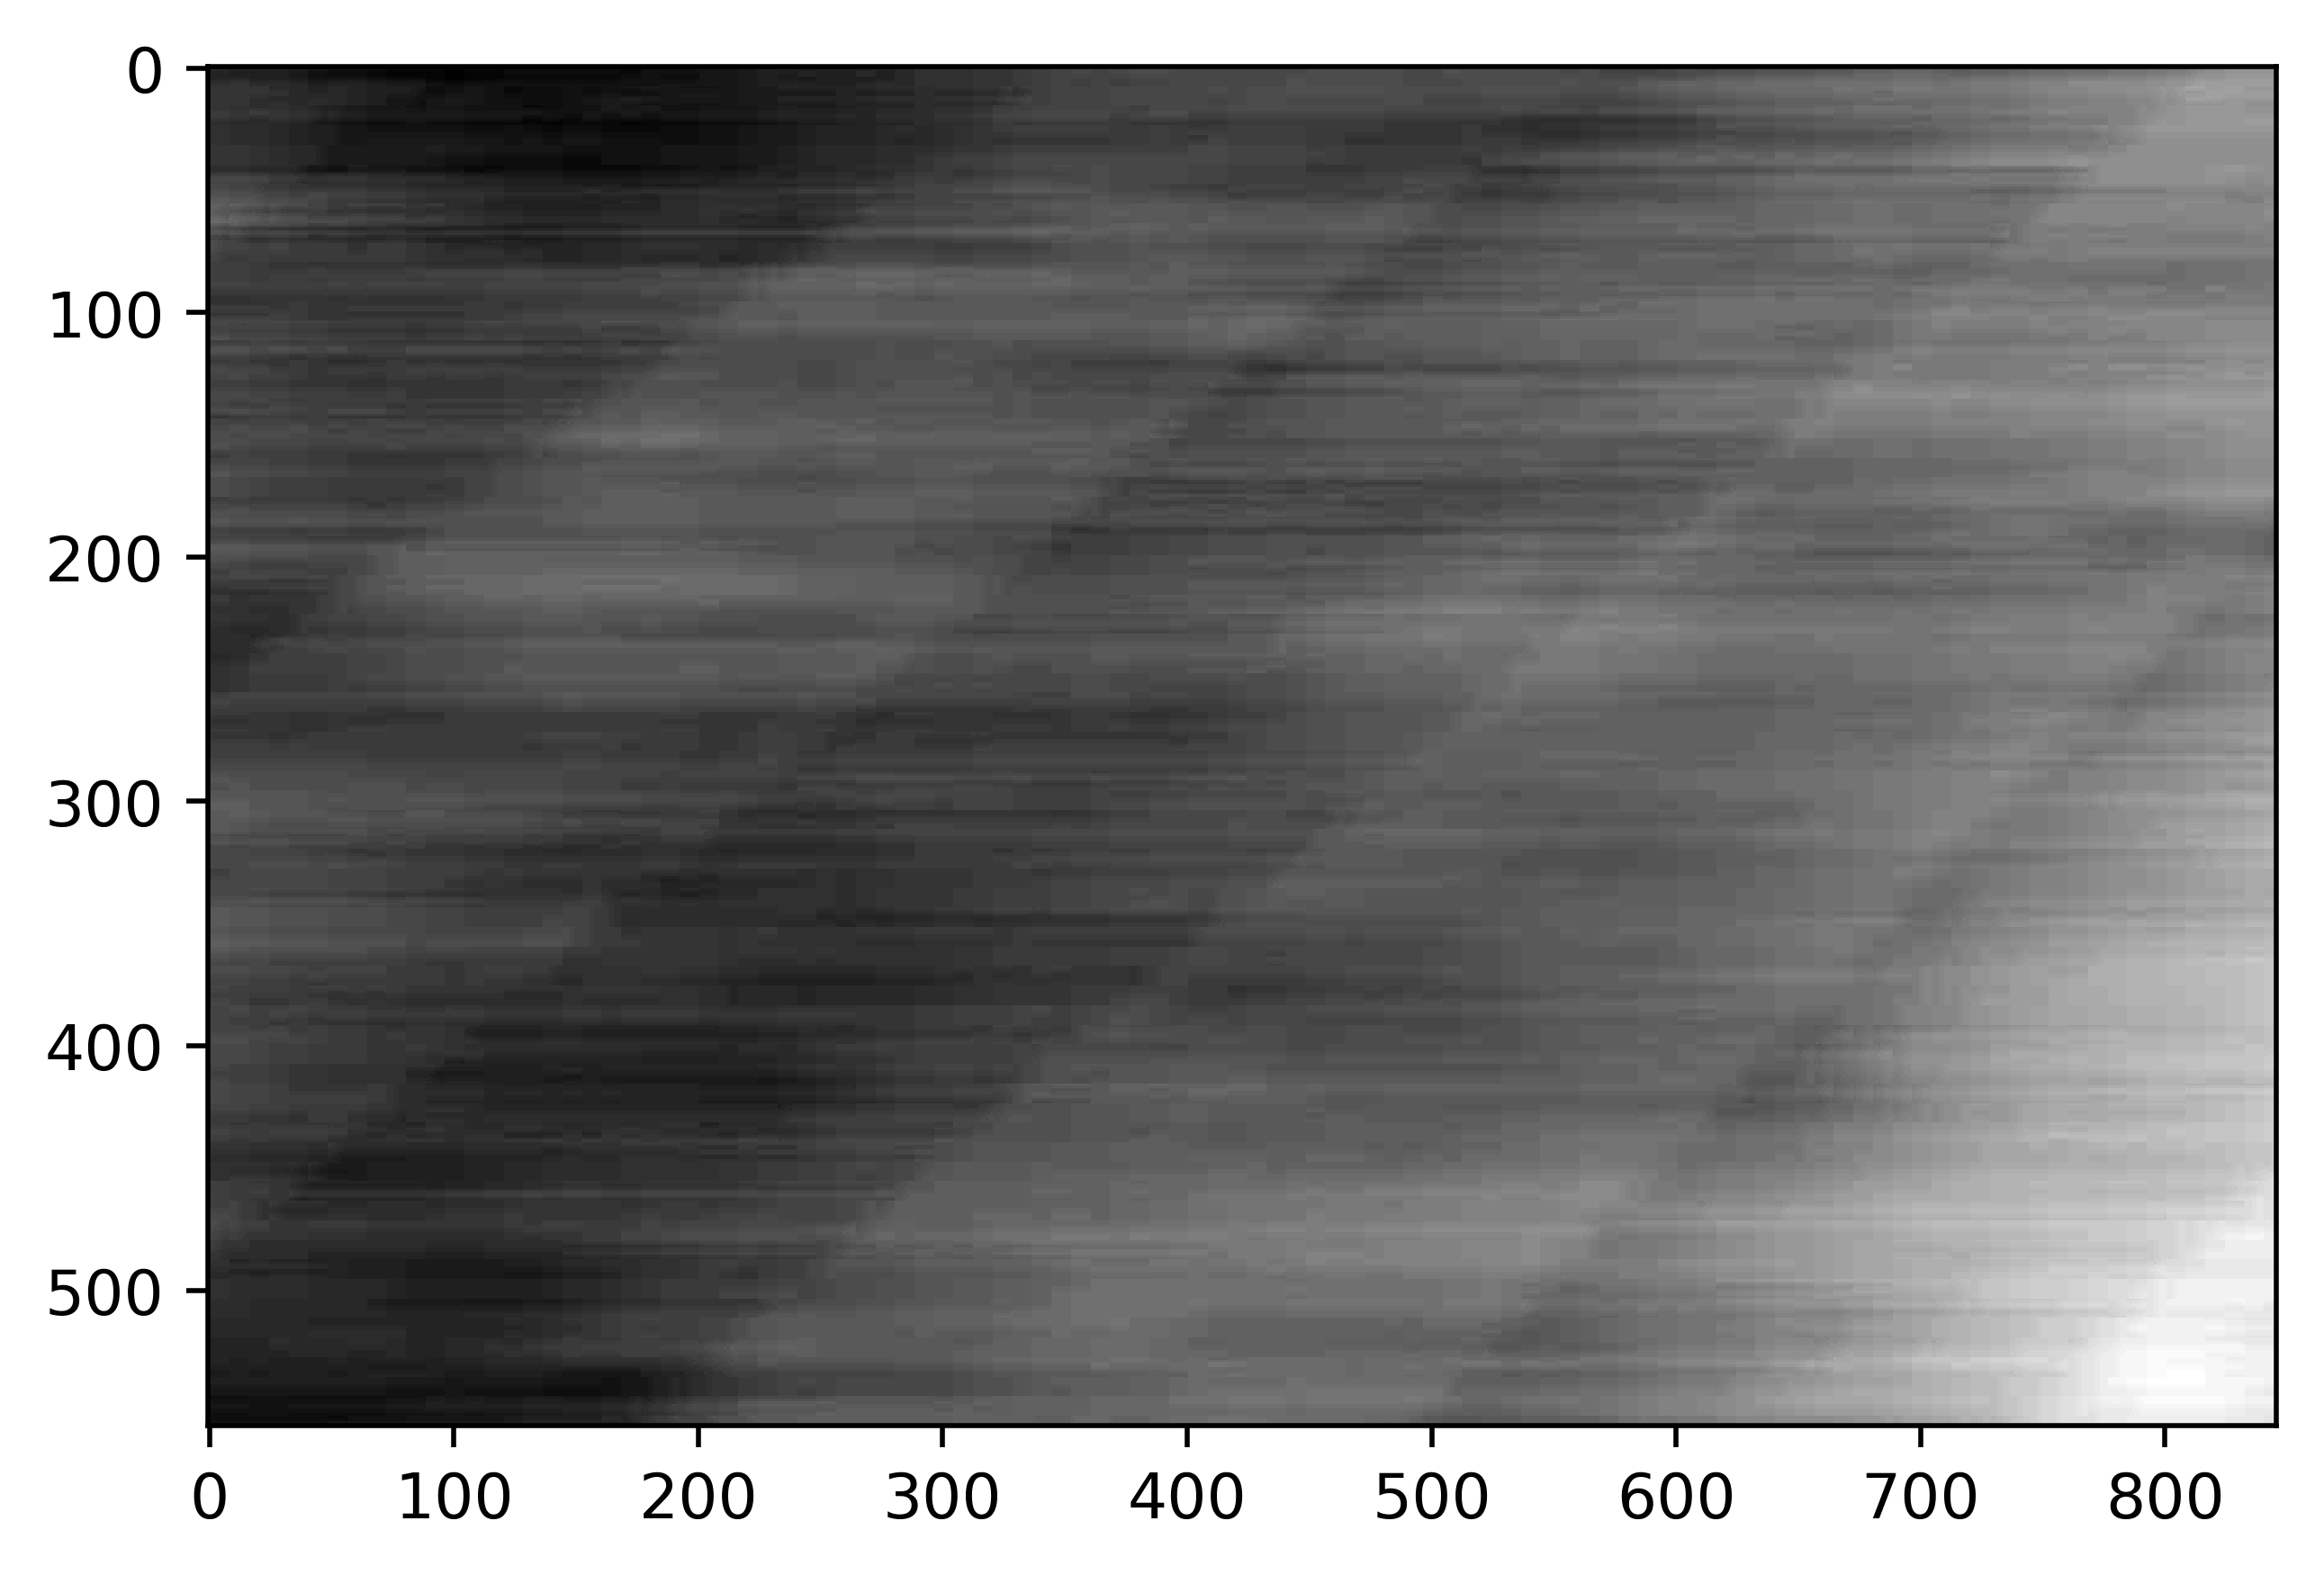

In [27]:
img_crop = cv2.imread("./Anh nhieu/2c.jpg", 0)
plt.imshow(img_crop, cmap='gray')

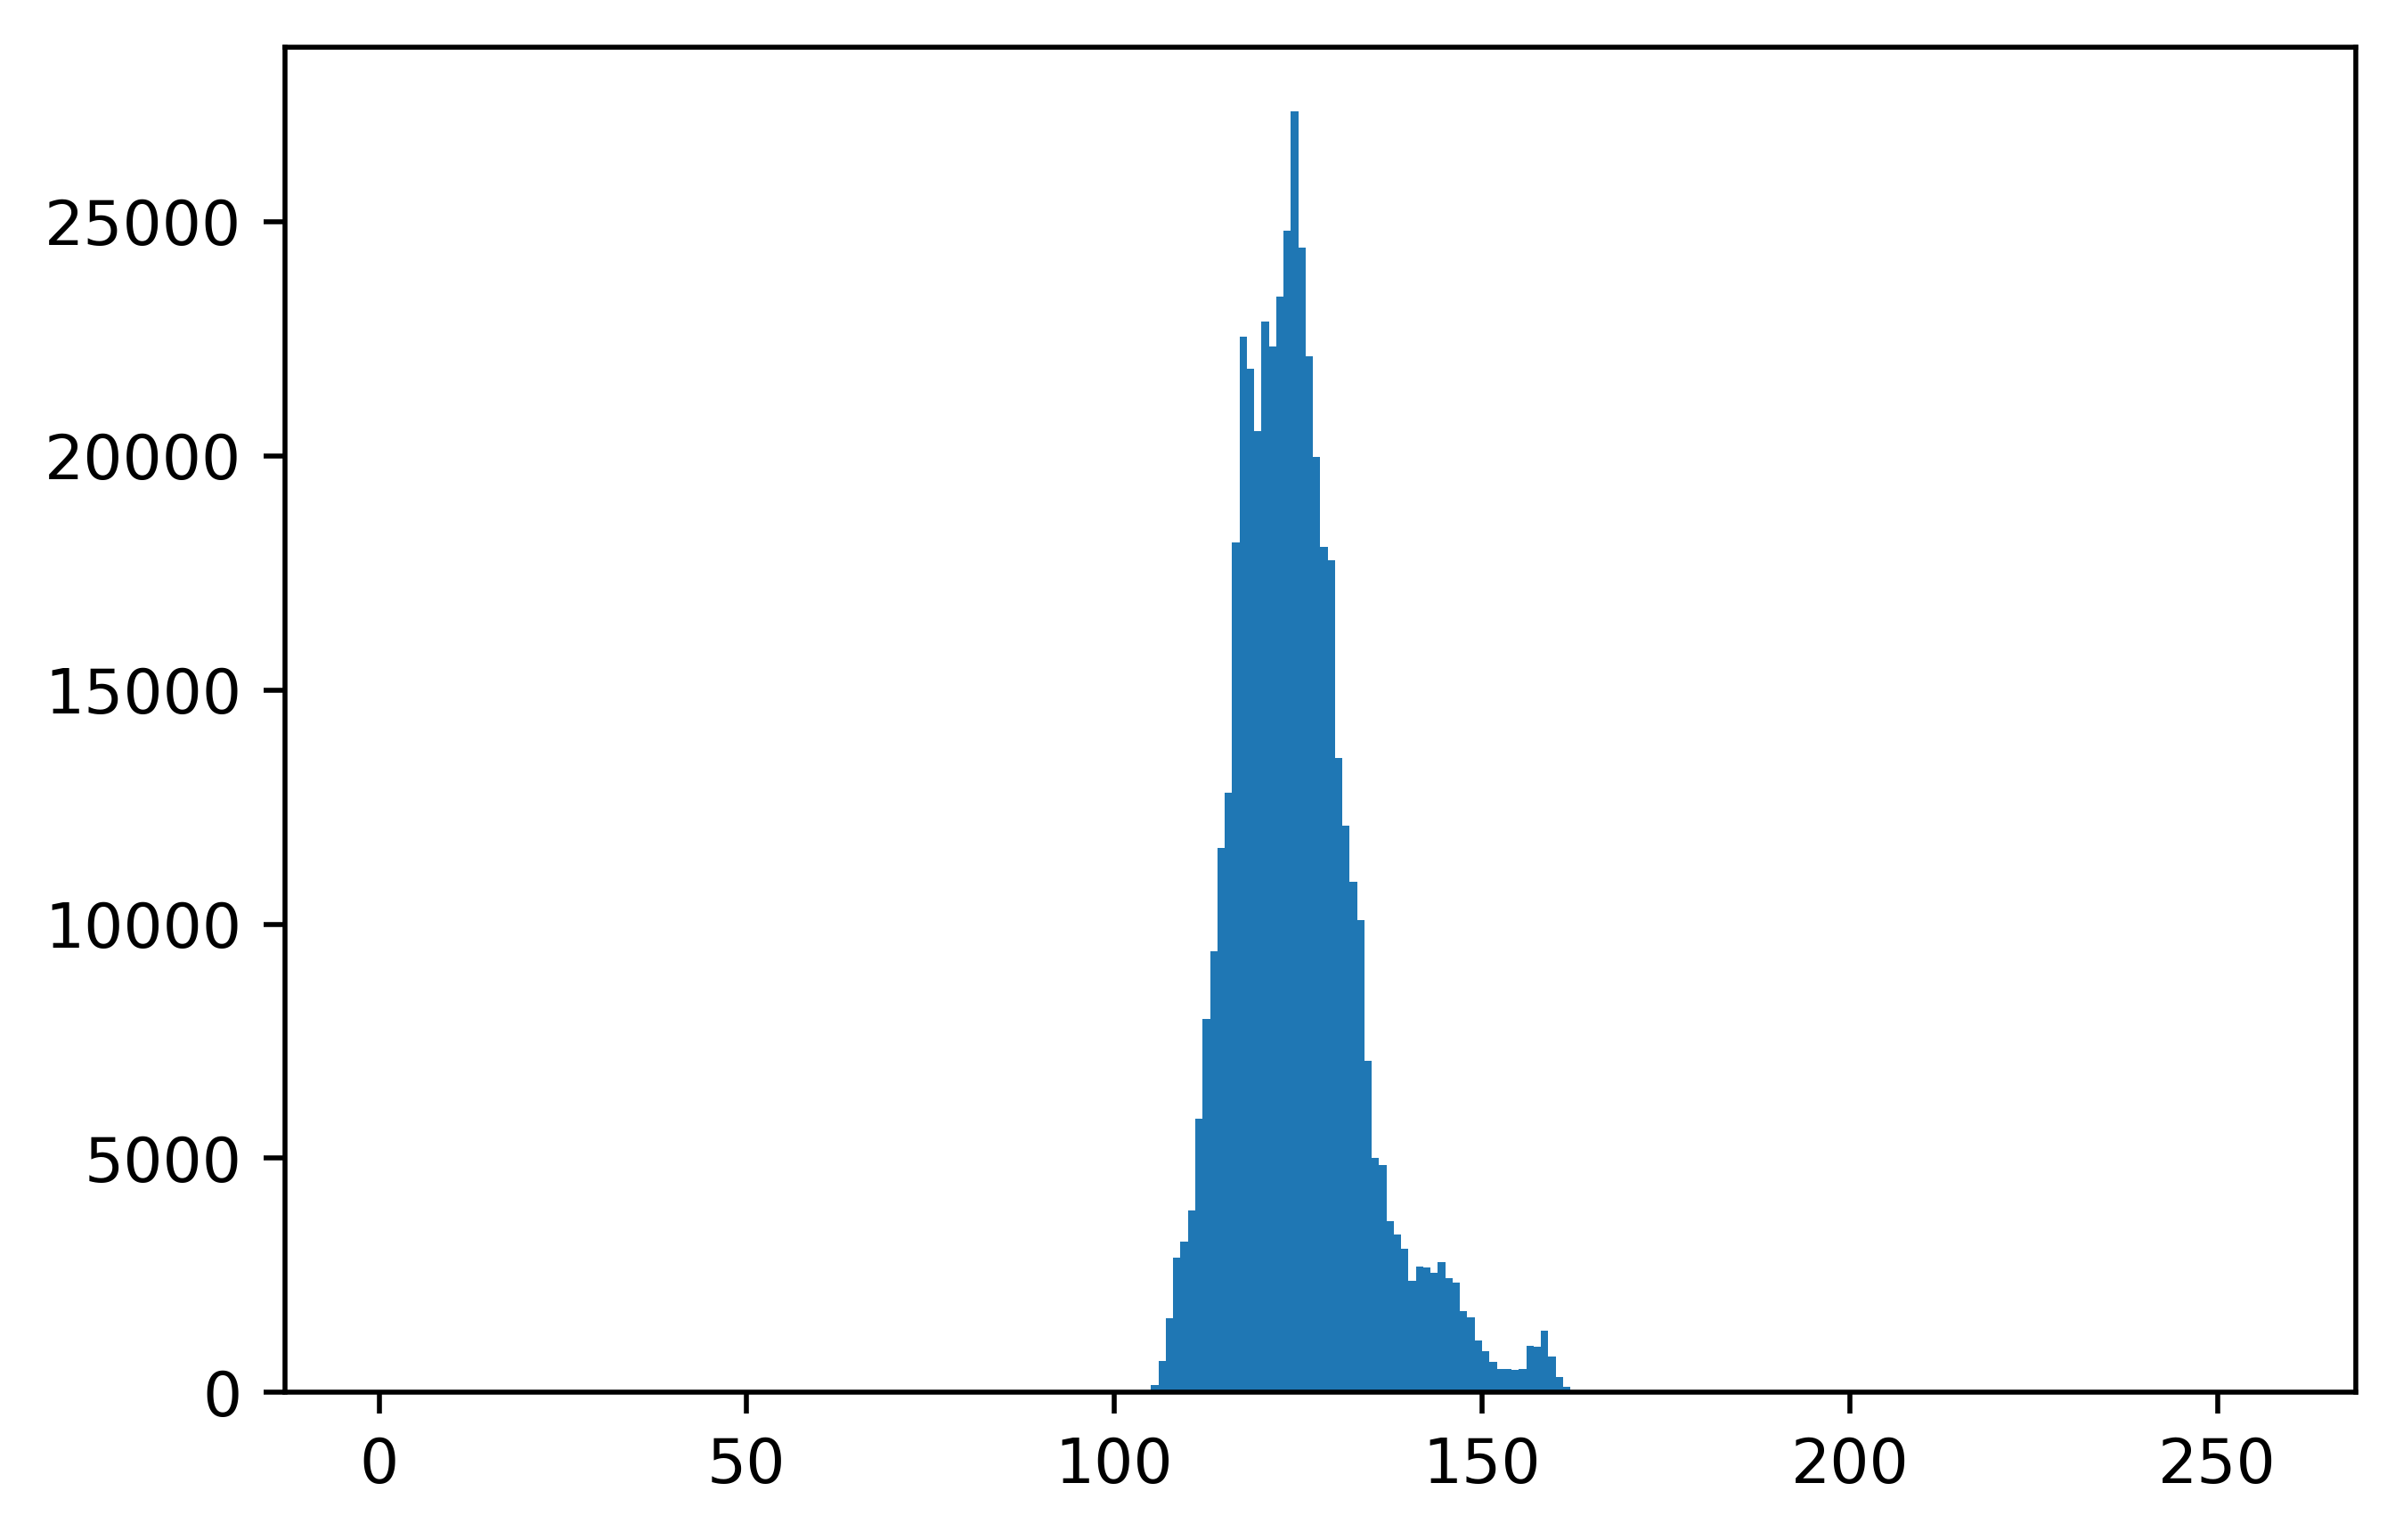

In [28]:
plt.hist(img_crop.ravel(), 256, [0, 256])
plt.show()

DO ẢNH NHIỄU DẠNG MOTION BLUR NÊN LỰA CHỌN MỘT KERNEL THÍCH HỢP CHO BỘ LỌC WIENER

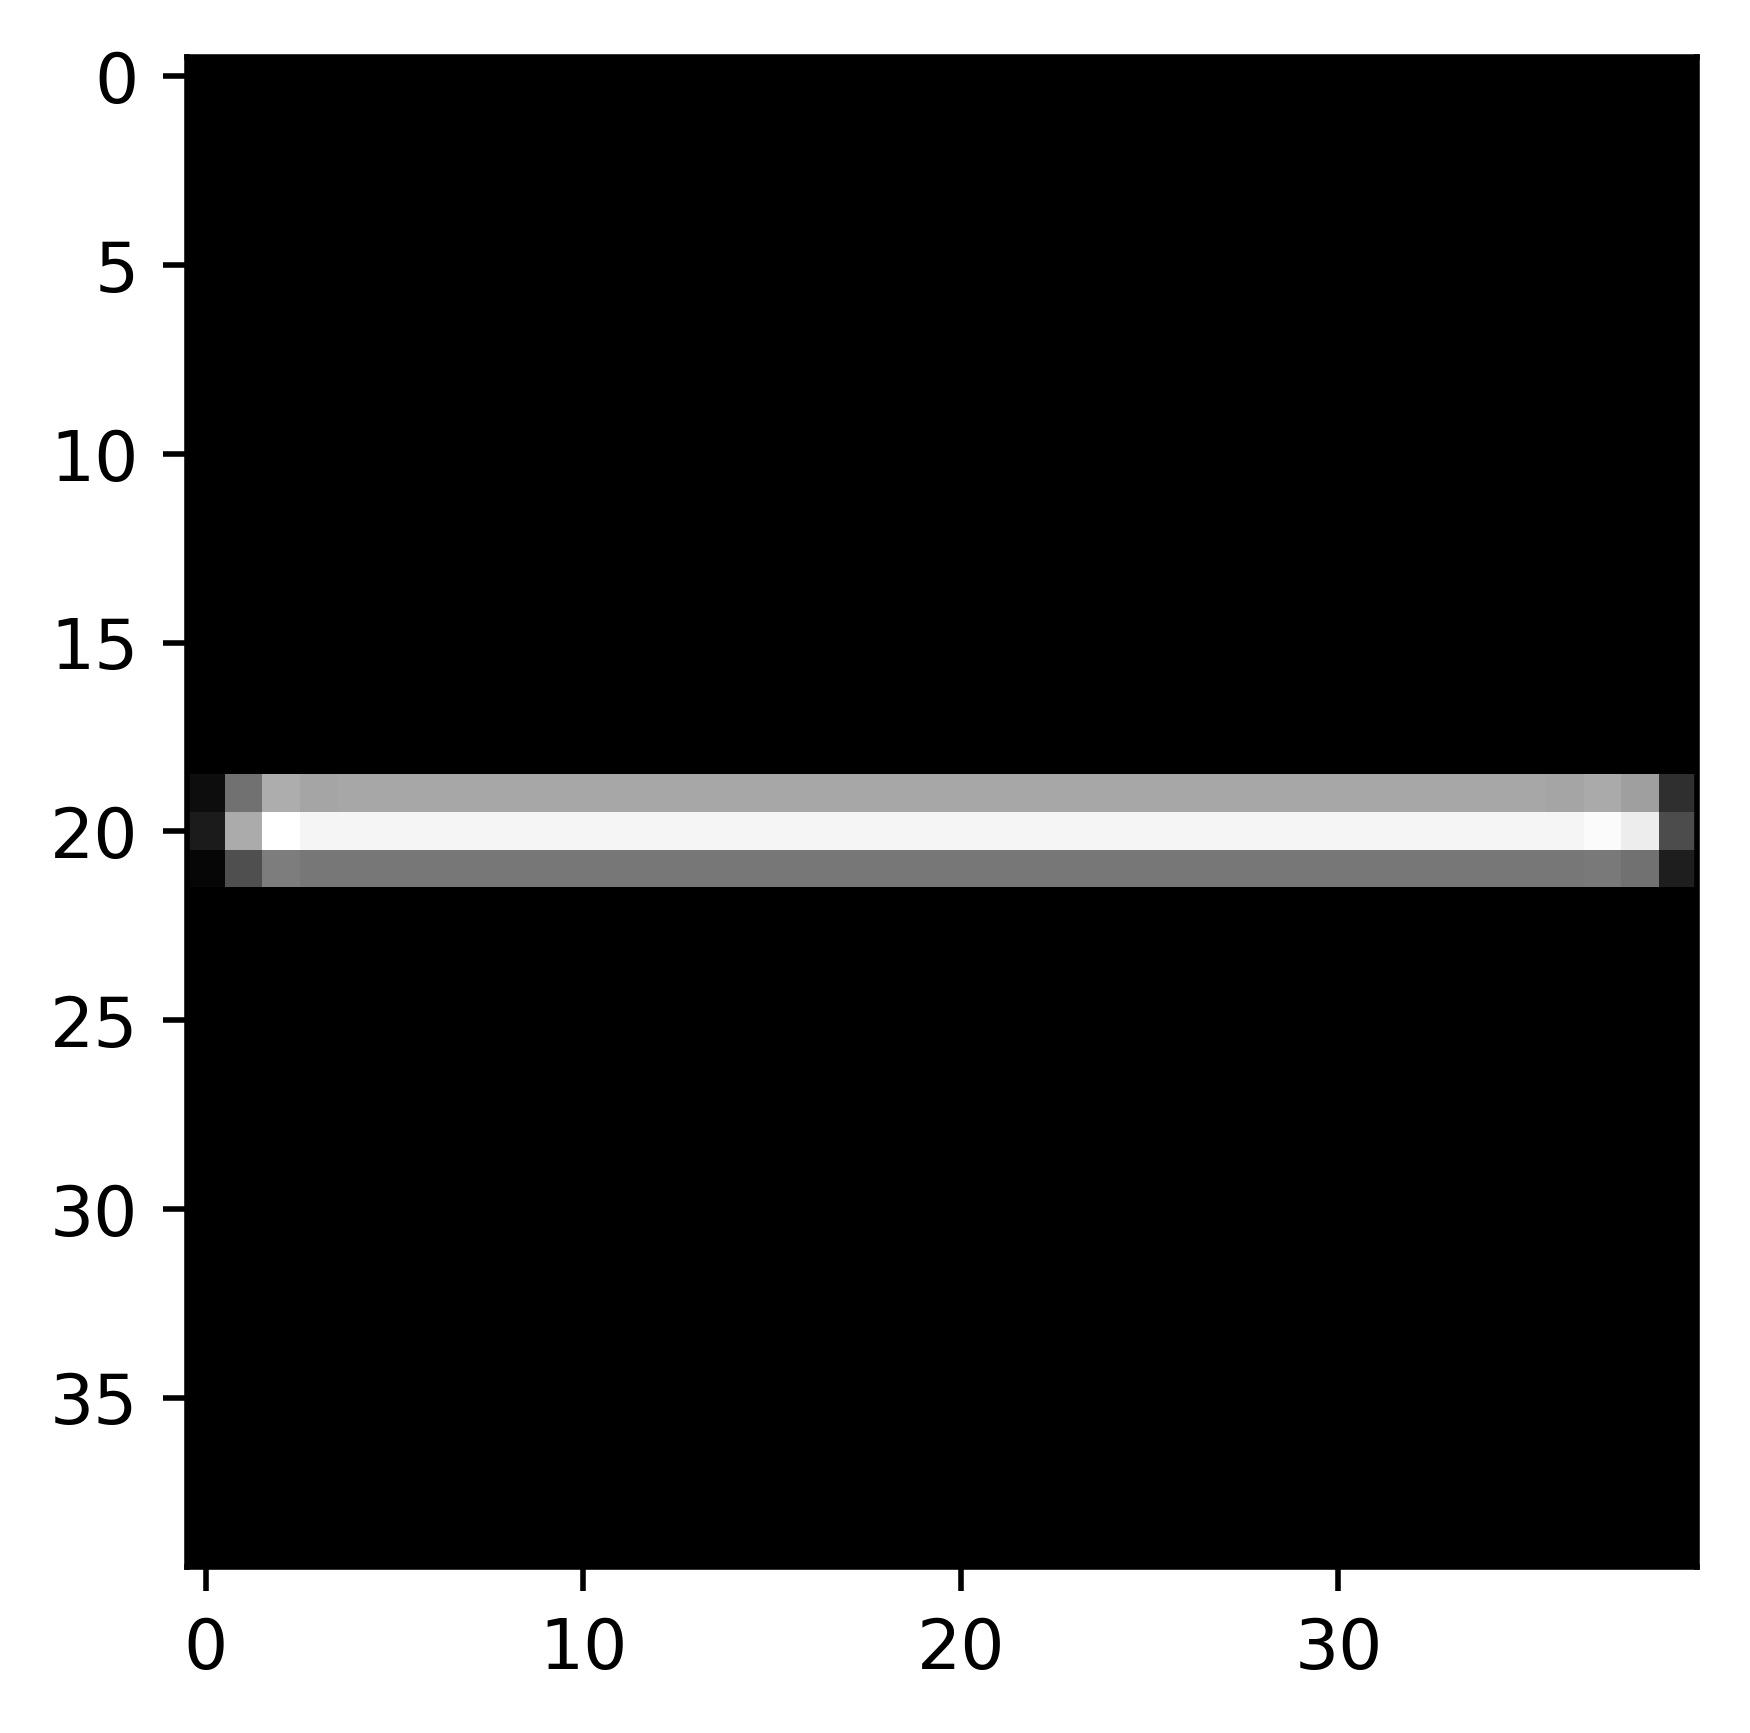

In [29]:
k2 = cv2.imread('./kernel2.png', 0)
plt.imshow(k2, cmap='gray')

ÁP DỤNG BỘ LỌC

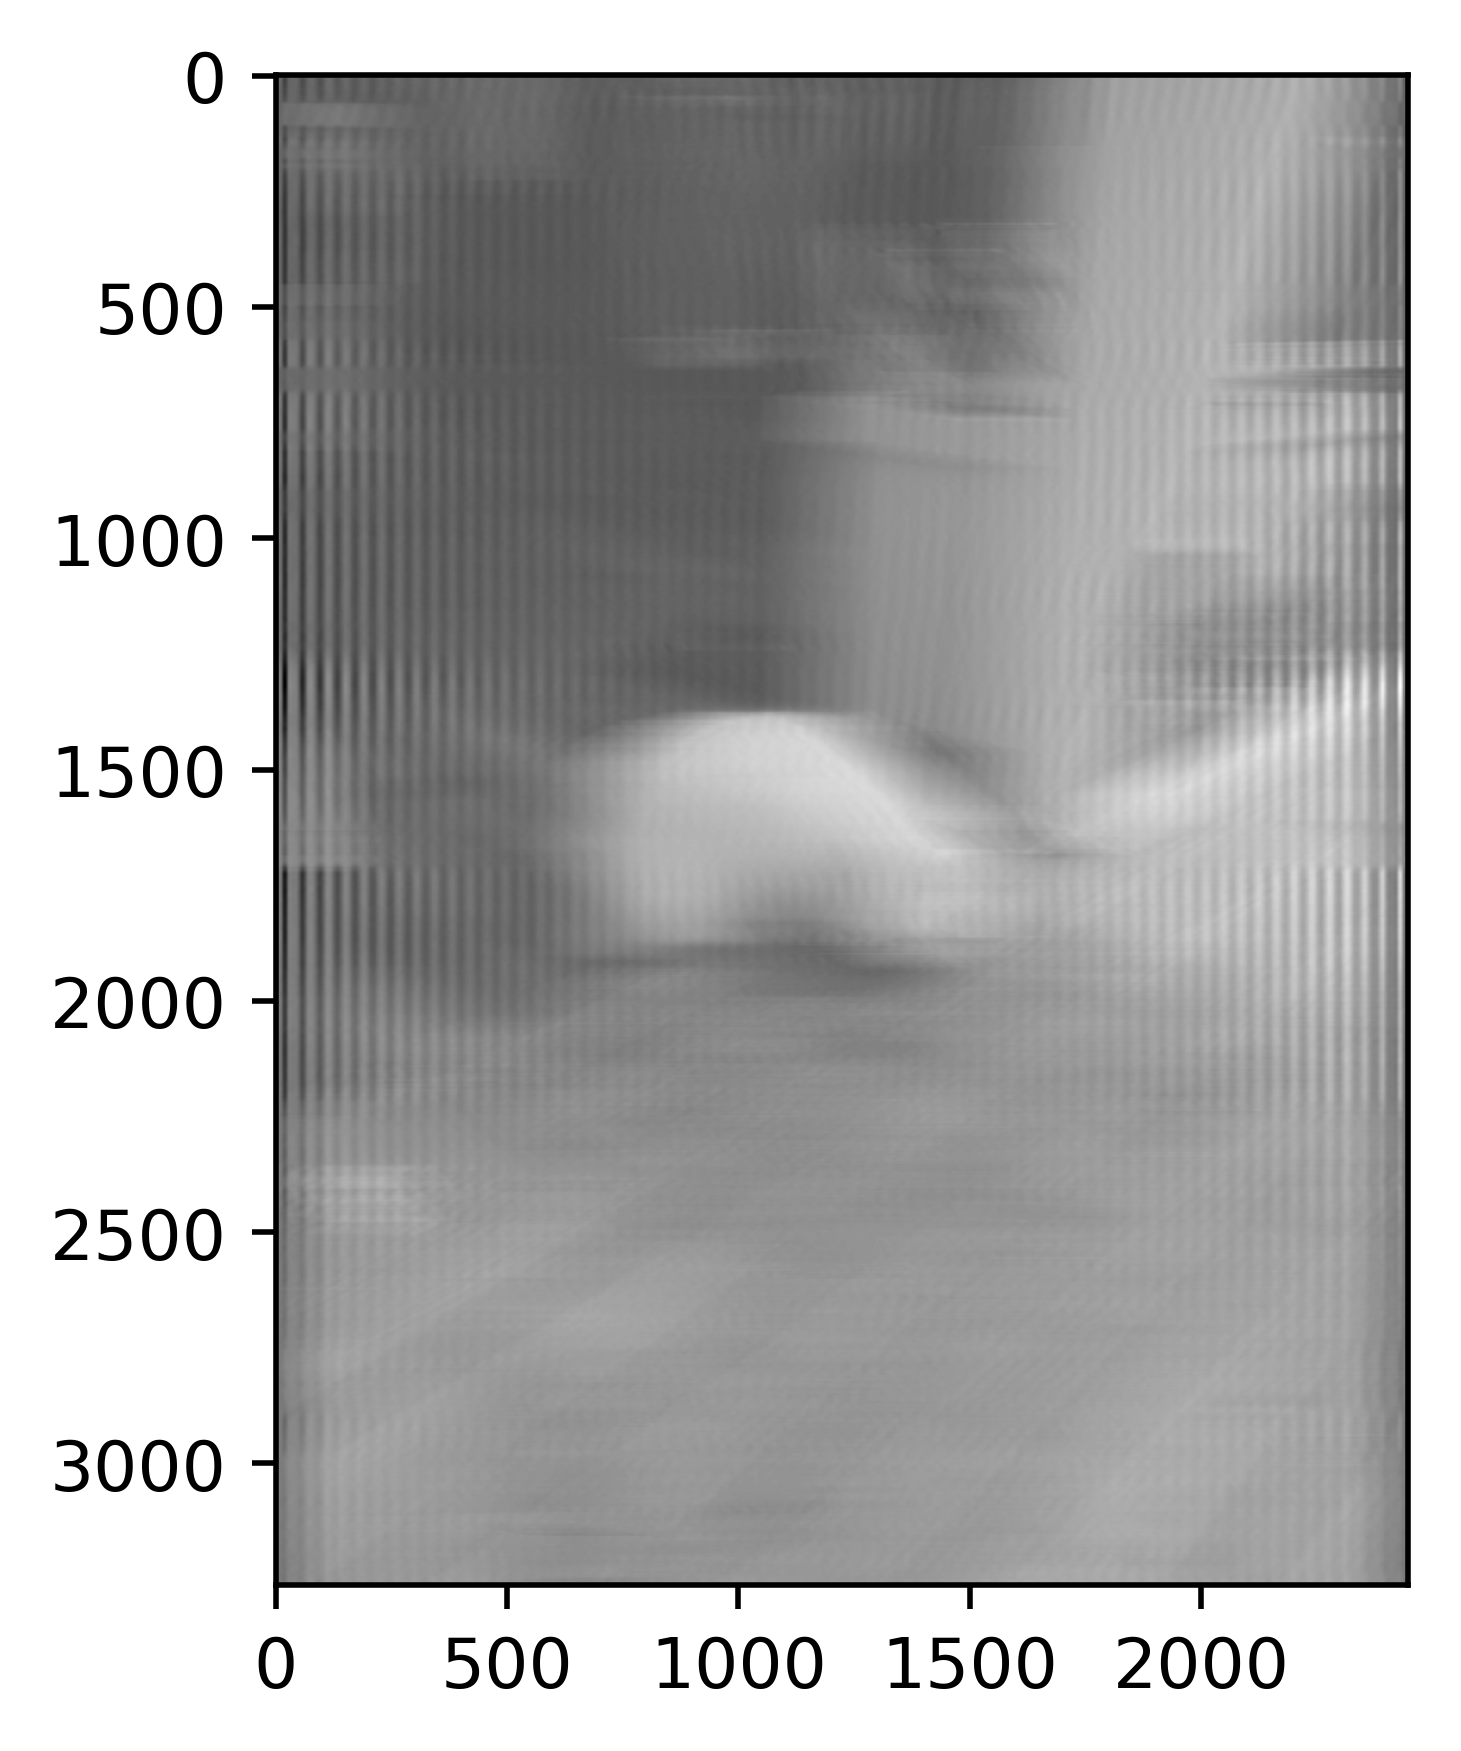

In [30]:
deconvolved_img = restoration.wiener(img, k2, 100000000)
plt.imshow(deconvolved_img, cmap='gray')

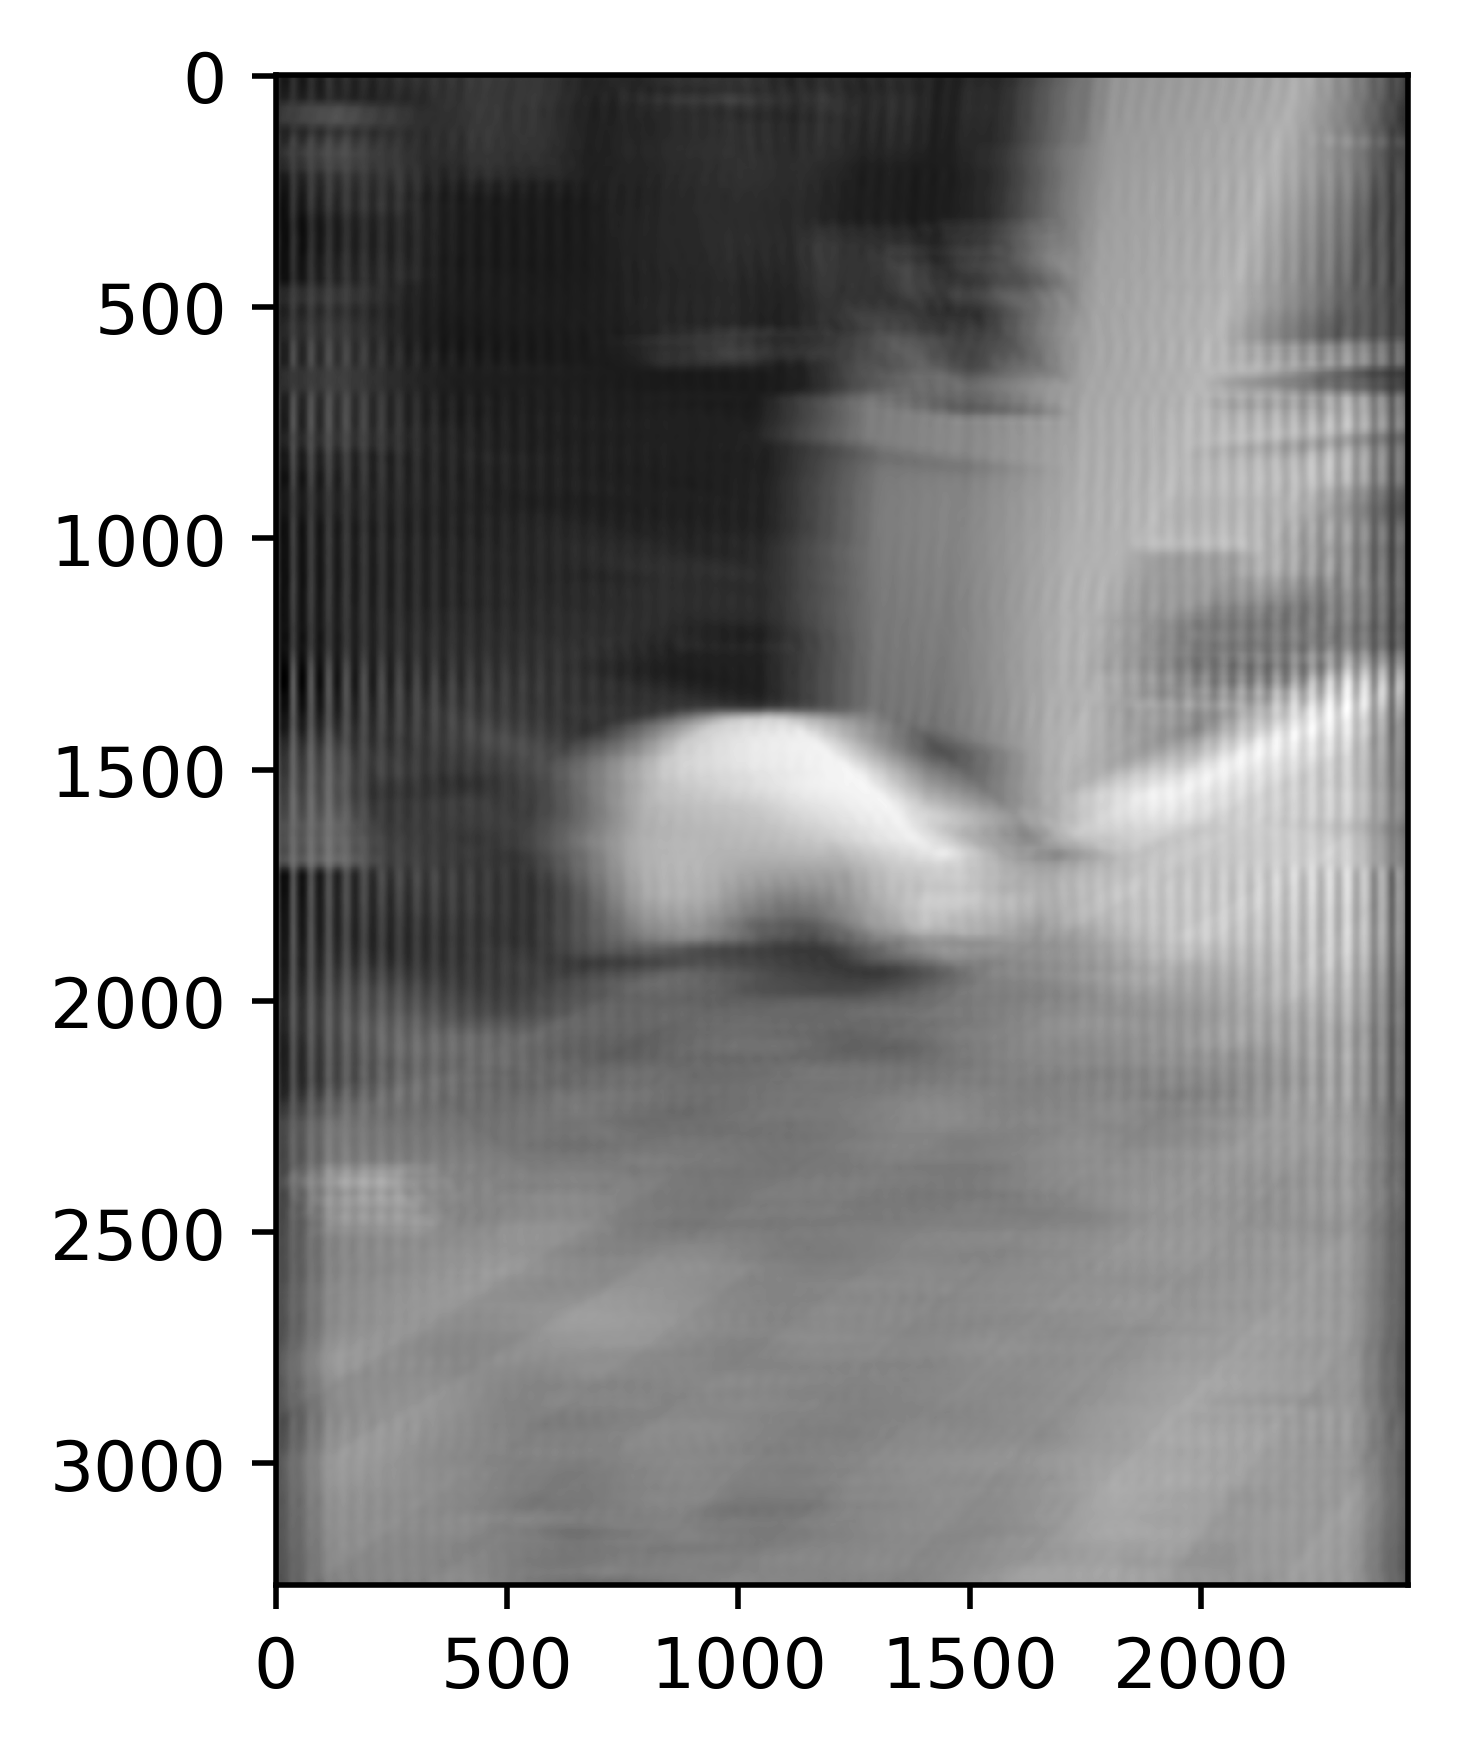

In [55]:
denoise = restoration.denoise_nl_means(
    deconvolved_img, patch_size=7, patch_distance=11, h=0.1, multichannel=False, fast_mode=True, sigma=0.0)
plt.imshow(denoise, cmap='gray')

In [48]:
plt.imsave('./Anh nhieu/2_denoise_wiener.jpg',
           denoise,
           format='jpg',
           cmap='gray')

In [49]:
import math
from skimage import img_as_float
from skimage.measure import compare_mse as mse

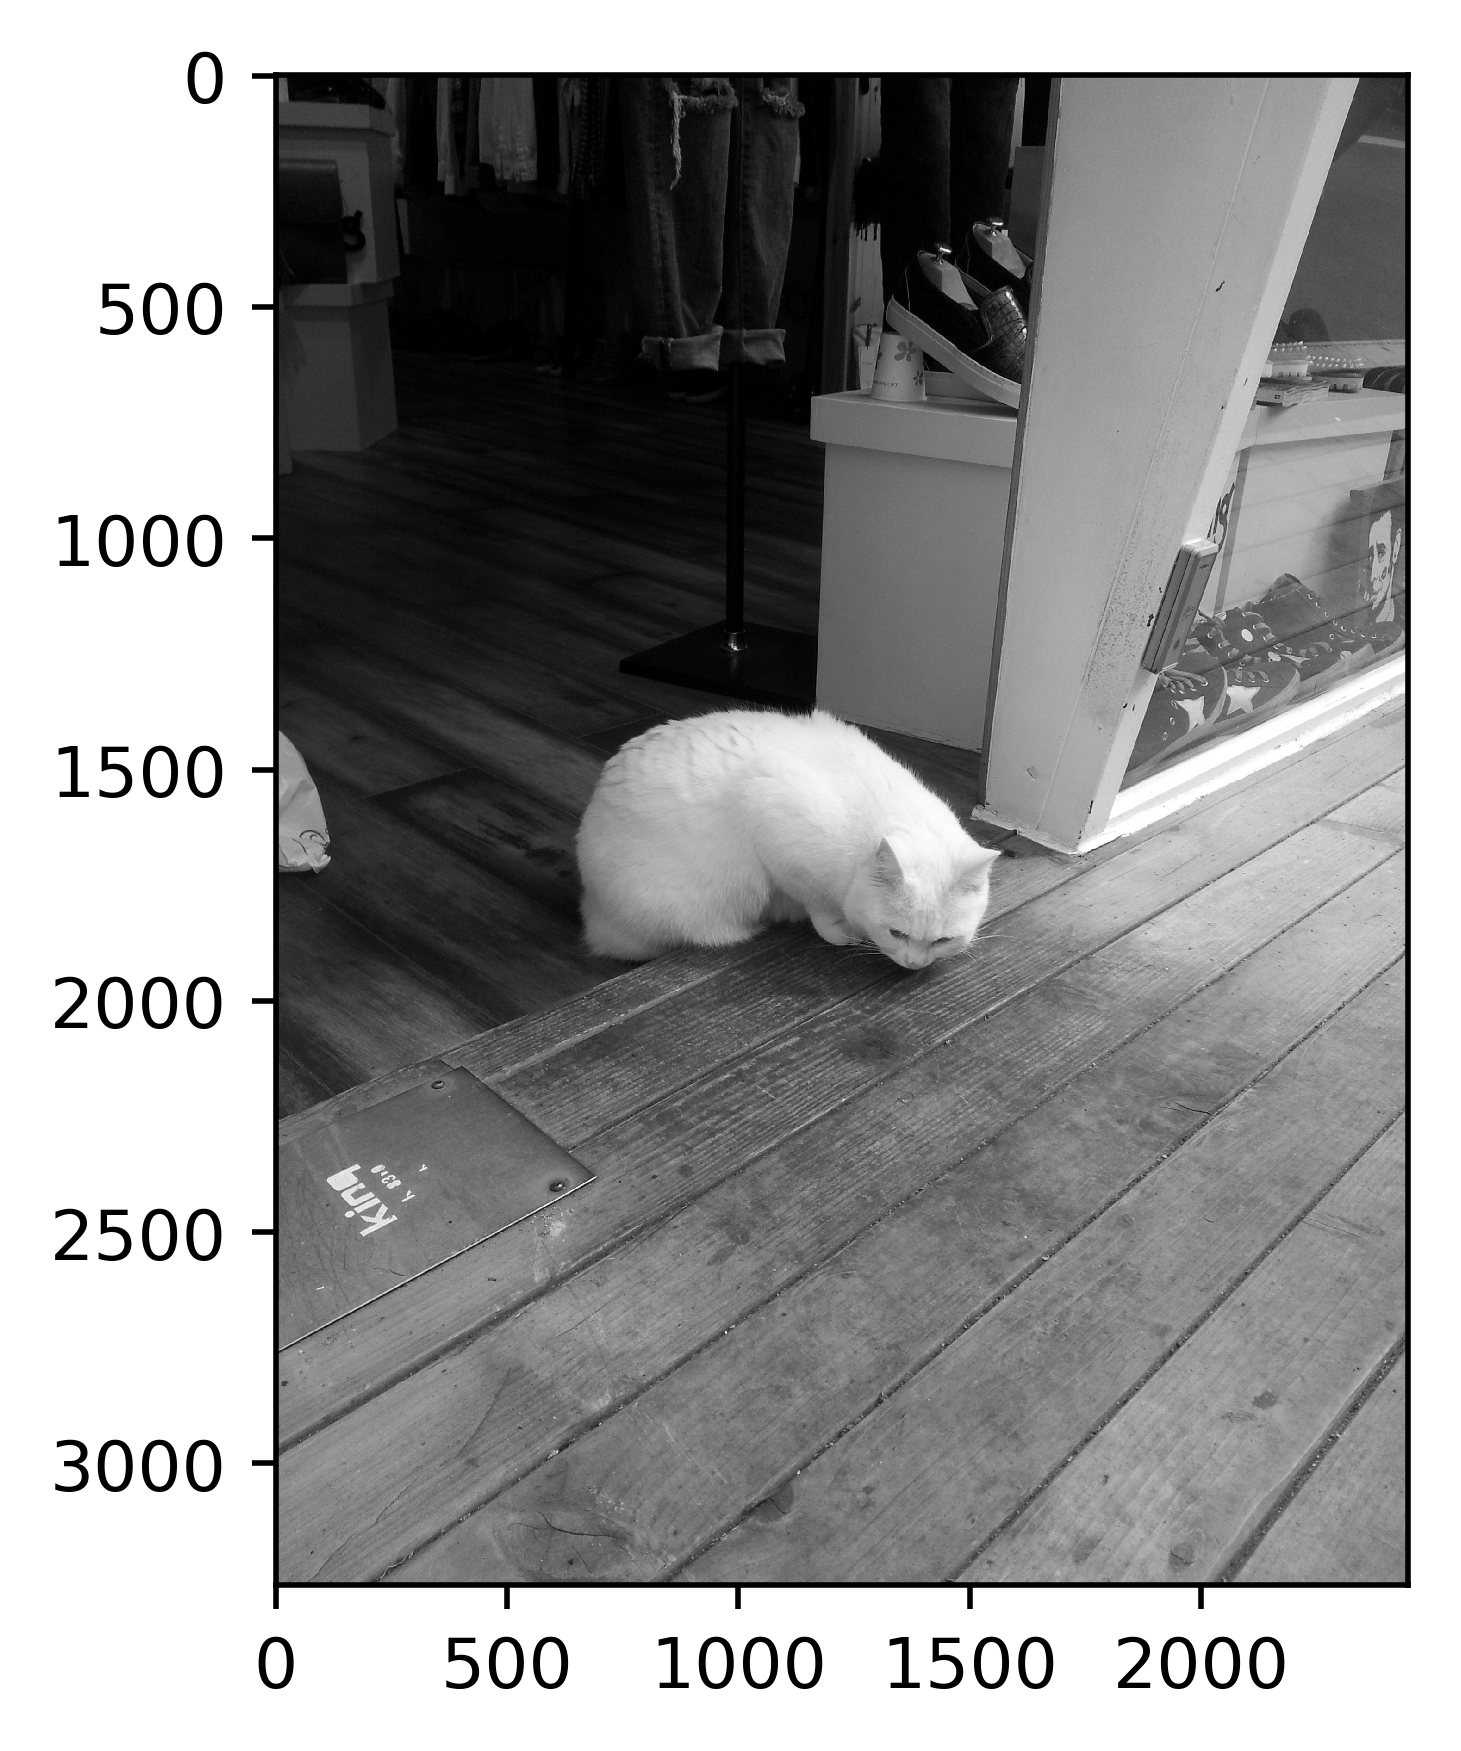

In [50]:
anh_goc = cv2.imread('./Anh nhieu/2g.jpg', 0)
plt.imshow(anh_goc, cmap='gray')

TÍNH MSE CỦA ẢNH NHIỄU SỐ 2 SO VỚI ẢNH GỐC

In [51]:
mse_noise = math.sqrt(mse(img_as_float(img), img_as_float(anh_goc)))
mse_noise

C:\Users\baole\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_mse has been moved to skimage.metrics.mean_squared_error. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.


0.08402953215338002

In [56]:
mse_denoise = math.sqrt(
    mse(img_as_float(denoise), img_as_float(anh_goc)))
mse_denoise

C:\Users\baole\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: UserWarning: DEPRECATED: skimage.measure.compare_mse has been moved to skimage.metrics.mean_squared_error. It will be removed from skimage.measure in version 0.18.
  


0.4548281511968288